# Explore datasets

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
%matplotlib inline

# Margin EDA

In [30]:
# Read margins csv as df. Adjust unix timestamps to make it easier to read
margins = pd.read_csv("data/runelite_data_margins.csv")
margins['highTime'] = pd.to_datetime(margins['highTime'], unit='s')
margins['lowTime'] = pd.to_datetime(margins['lowTime'], unit='s')
margins.head()

,itemID,name,high,highTime,low,lowTime,margin,marginAdjusted,limit,potentialProfit
0,23345,3rd_age_druidic_cloak,1517236000,2025-04-10 14:23:47,1453500000,2025-04-11 21:47:29,63736000,58736000.00,8,4.698880e+08
1,12437,3rd_age_cloak,569899899,2025-04-13 22:08:12,558123000,2025-04-12 22:47:25,11776899,6776899.00,8,5.421519e+07
2,10348,3rd_age_platebody,273012454,2025-04-13 20:17:16,265656456,2025-04-13 22:08:14,7355998,4625873.46,8,3.700699e+07
3,12817,Elysian_spirit_shield,818864788,2025-04-13 22:23:44,810403302,2025-04-13 22:14:22,8461486,3461486.00,8,2.769189e+07
4,12825,Arcane_spirit_shield,192859174,2025-04-13 21:54:54,187593227,2025-04-13 22:22:19,5265947,3337355.26,8,2.669884e+07


# Time Series EDA for specific items

In [31]:
'''Set item to examine'''
itemID = 2577

In [32]:
'''5m time series data'''
df = pd.read_csv(f"data/runelite/runelite_data_5m_{itemID}.csv")

# Get name of item
itemName = df['name'][0]
# Convert the 'timestamp' column to datetime objects
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')

marginData = margins[margins['itemID'] == itemID]
marginData.head()


,itemID,name,high,highTime,low,lowTime,margin,marginAdjusted,limit,potentialProfit
128,2577,Ranger_boots,35079055,2025-04-13 22:21:28,34533111,2025-04-13 22:31:45,545944,195153.45,8,1561227.6


In [33]:
# Calc daily volume at each point
highVol = df['highPriceVolume'].sum()
lowVol = df['lowPriceVolume'].sum()
totalVol = highVol + lowVol
percentLow = (lowVol/totalVol) * 100

print(f"High price volume: {highVol}")
print(f"Low price volume: {lowVol}")
print(f"Total volume: {totalVol}")
print(f"Percent of trades at low price volume {percentLow.round(1)}%")


df.describe()

High price volume: 358
Low price volume: 383
Total volume: 741
Percent of trades at low price volume 51.7%


,itemID,timestamp,avgHighPrice,avgLowPrice,highPriceVolume,lowPriceVolume
count,365.0,365,2.160000e+02,2.300000e+02,365.000000,365.000000
mean,2577.0,2025-04-13 18:22:37.808219136,3.540751e+07,3.498126e+07,0.980822,1.049315
min,2577.0,2025-04-12 17:55:00,3.400000e+07,3.380918e+07,0.000000,0.000000
25%,2577.0,2025-04-13 05:40:00,3.513810e+07,3.472264e+07,0.000000,0.000000
50%,2577.0,2025-04-13 18:30:00,3.549948e+07,3.502281e+07,1.000000,1.000000
75%,2577.0,2025-04-14 06:15:00,3.572244e+07,3.530000e+07,2.000000,2.000000
max,2577.0,2025-04-14 20:50:00,3.600000e+07,3.570000e+07,6.000000,5.000000
std,0.0,NaN,4.465204e+05,3.972041e+05,1.054641,1.100839


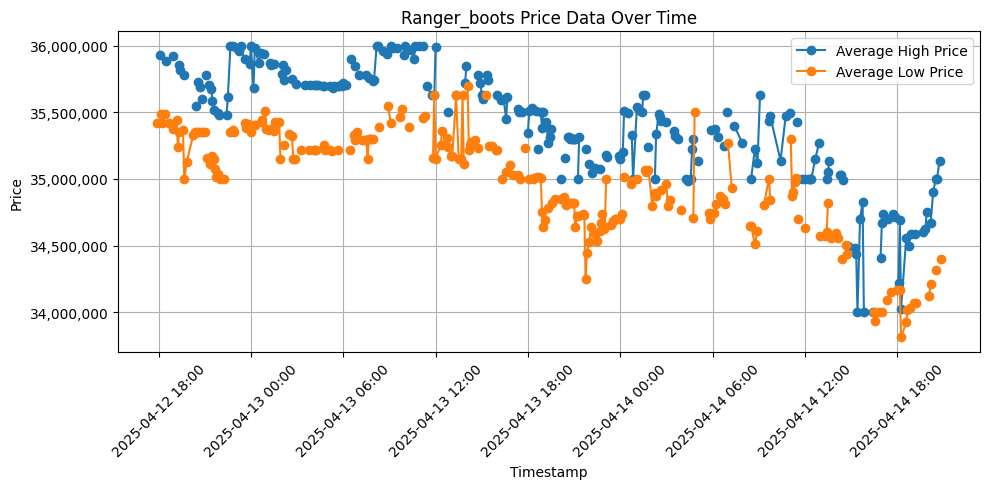

In [34]:
# Create the plot with an appropriate figure size
plt.figure(figsize=(10, 5))

# Plot the data series
plt.plot(df['timestamp'], df['avgHighPrice'], label='Average High Price', marker='o')
plt.plot(df['timestamp'], df['avgLowPrice'], label='Average Low Price', marker='o')

# Add title and labels
plt.title(f'{itemName} Price Data Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Price')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Format the x-axis to display day and time down to the minute
date_formatter = mdates.DateFormatter('%Y-%m-%d %H:%M')
plt.gca().xaxis.set_major_formatter(date_formatter)

# Format the y-axis with comma separators for better readability.
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x:,.0f}'))

# Add legend and grid for clarity
plt.legend()
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()

In [37]:
'''1h time series data'''
df2 = pd.read_csv(f"data/runelite/runelite_data_1h_{itemID}.csv")

# Convert the 'timestamp' column to datetime objects
df2['timestamp'] = pd.to_datetime(df2['timestamp'], unit='s')

marginData = margins[margins['itemID'] == itemID]
marginData.head()

,itemID,name,high,highTime,low,lowTime,margin,marginAdjusted,limit,potentialProfit
128,2577,Ranger_boots,35079055,2025-04-13 22:21:28,34533111,2025-04-13 22:31:45,545944,195153.45,8,1561227.6


In [38]:
# Calc daily volume at each point
highVol = df2['highPriceVolume'].sum()
lowVol = df2['lowPriceVolume'].sum()
totalVol = highVol + lowVol
percentLow = (lowVol/totalVol) * 100

print(f"High price volume: {highVol}")
print(f"Low price volume: {lowVol}")
print(f"Total volume: {totalVol}")
print(f"Percent of trades at low price volume {percentLow.round(1)}%")


df2.describe()

High price volume: 2162
Low price volume: 2698
Total volume: 4860
Percent of trades at low price volume 55.5%


,itemID,timestamp,avgHighPrice,avgLowPrice,highPriceVolume,lowPriceVolume
count,365.0,365,3.620000e+02,3.580000e+02,365.000000,365.000000
mean,2577.0,2025-04-07 05:54:04.931506688,3.654928e+07,3.612731e+07,5.923288,7.391781
min,2577.0,2025-03-30 14:00:00,3.420357e+07,3.397279e+07,0.000000,0.000000
25%,2577.0,2025-04-03 11:00:00,3.608707e+07,3.565879e+07,3.000000,4.000000
50%,2577.0,2025-04-07 06:00:00,3.645005e+07,3.599062e+07,6.000000,7.000000
75%,2577.0,2025-04-11 01:00:00,3.712303e+07,3.662680e+07,8.000000,10.000000
max,2577.0,2025-04-14 20:00:00,3.815001e+07,3.756056e+07,19.000000,32.000000
std,0.0,NaN,7.368761e+05,7.350439e+05,3.416127,4.507922


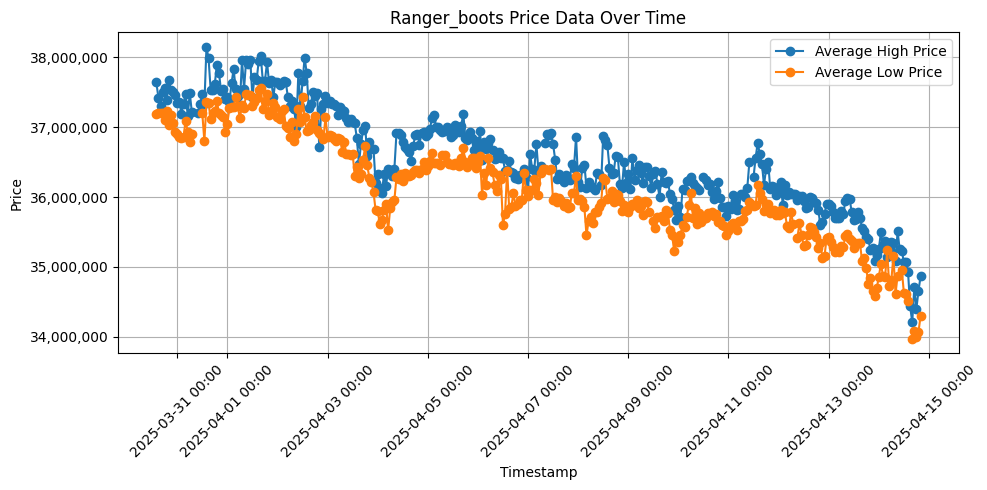

In [39]:
# Create the plot with an appropriate figure size
plt.figure(figsize=(10, 5))

# Plot the data series
plt.plot(df2['timestamp'], df2['avgHighPrice'], label='Average High Price', marker='o')
plt.plot(df2['timestamp'], df2['avgLowPrice'], label='Average Low Price', marker='o')

# Add title and labels
plt.title(f'{itemName} Price Data Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Price')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Format the x-axis to display day and time down to the minute
date_formatter = mdates.DateFormatter('%Y-%m-%d %H:%M')
plt.gca().xaxis.set_major_formatter(date_formatter)

# Format the y-axis with comma separators for better readability.
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x:,.0f}'))

# Add legend and grid for clarity
plt.legend()
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()

# Modeling

In [10]:
import torch
from torch import nn
from torch.nn import functional as F
import torchvision
from torch.utils.data import TensorDataset, DataLoader
import torch.optim as optim

import numpy as np

from sklearn.preprocessing import MinMaxScaler


In [11]:
# Set device and torch data type
device = "cuda:0" if torch.cuda.is_available() else "cpu"
torch_dtype = torch.float16 if torch.cuda.is_available() else torch.float32
print(device)

cuda:0


In [12]:
'''Construct a model with a RNN layer + a MLP to process the regression'''
class LSTMBasedNetwork(nn.Module):
    def __init__(self, num_inputs, hidden_size, num_layers, output_size):
        super(LSTMBasedNetwork, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        
        # use torch.nn LSTM layer to handle LSTM logic. Expects: (t, batch_size, features)
        self.lstm = nn.LSTM(num_inputs, hidden_size, num_layers, batch_first=False)
        
        # Use a linear model to handle the regression
        self.net = nn.Linear(hidden_size, output_size)
        
        # Dropout layer after LSTM to regularize between the layers
        self.dropout = nn.Dropout(0.2)
        
    def forward(self, x):
        # x: (batch_size, t, features)
        # Make input match (t, batch_size, features)
        x = x.transpose(0,1)
        
        # Initialize hidden state with shape (num_layers, batch_size, features)
        h0 = torch.zeros(self.num_layers, x.size(1), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(1), self.hidden_size).to(x.device)  # Initialize cell state
        
        # Pass to lstm
        # output shape: (t, batch_size, hidden_size)
        output, (hn, cn) = self.lstm(x, (h0, c0))  # output shape: (t, batch_size, hidden_size)
        
        # Apply dropout after LSTM output
        output = self.dropout(output)
        
        # Use the last time step's output for regression
        output = self.net(output[-1])
        return output

In [13]:
'''Set up training function'''
def train_model(model, num_epochs, opt, loss_fn, data_loader):
    model.train()
    # train using batches
    for epoch in range(num_epochs):
        for batch_inputs, batch_targets in data_loader:
            batch_inputs, batch_targets = batch_inputs.to(device), batch_targets.to(device)
            opt.zero_grad()
            outputs = model(batch_inputs)
            loss = loss_fn(outputs, batch_targets)
            loss.backward()
            optimizer.step()
        if (epoch+1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

In [48]:
'''Prepare data'''
# Reload dataset in to get original unix timestamp
timeSeriesData = '5m'
df_rnn = pd.read_csv(f"data/runelite/runelite_data_{timeSeriesData}_{itemID}.csv")

# Sort by timestamp to preserve temporal order
df_rnn = df_rnn.sort_values('timestamp')

# Filter necessary columns
df_rnn = df_rnn[['timestamp', 'avgHighPrice', 'avgLowPrice']]

# Interpolate missing values using a linear method
df_rnn = df_rnn.interpolate(method='linear', limit_direction='both')

# Normalize prices
scaler = MinMaxScaler()
df_rnn[['avgHighPrice', 'avgLowPrice']] = scaler.fit_transform(df_rnn[['avgHighPrice', 'avgLowPrice']])


In [49]:
'''Create sequences'''
def create_sequences(data, sequence_length):
    xs, ys = [], []

    for i in range(len(data) - sequence_length):
        x = data[i:i+sequence_length]
        y = data[i+sequence_length]  # predict next point (regression)
        xs.append(x)
        ys.append(y)

    return torch.tensor(xs, dtype=torch.float32), torch.tensor(ys, dtype=torch.float32)

# Convert to NumPy array
price_data = df_rnn[['avgHighPrice', 'avgLowPrice']].values

# Get time as numpy array for plotting later
time_data = df_rnn[['timestamp']].values

# Choose sequence length
SEQ_LENGTH = 10

# Create input and output sequences
X, y = create_sequences(price_data, SEQ_LENGTH)

In [50]:
'''Wrap sequenced data in a tensor dataloader'''

batch_size = 32
dataset = TensorDataset(X, y)
loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

In [51]:
'''Define hyperparameters and init the model'''

# Define model hyperparameters
num_inputs = 2 # number of features. Here only 1
hidden_size = 32 # use same as from chapter 8.6 implementation
num_layers = 2 # going too wide here will cause gradient issues
output_size = 2 # regression problem with 1 feature output needed in prediction

# Init model
model = LSTMBasedNetwork(num_inputs, hidden_size, num_layers,output_size).to(device)

# Define training hyperparameters
loss_fn = nn.MSELoss()
lr = 1e-3
optimizer = optim.Adam(model.parameters(), lr=lr)
num_epochs = 100

In [52]:
'''Train the model using the RNN layer'''
train_model(model, num_epochs, optimizer, loss_fn, loader)

Epoch [10/100], Loss: 0.0077
Epoch [20/100], Loss: 0.0064
Epoch [30/100], Loss: 0.0086
Epoch [40/100], Loss: 0.0089
Epoch [50/100], Loss: 0.0052
Epoch [60/100], Loss: 0.0054
Epoch [70/100], Loss: 0.0017
Epoch [80/100], Loss: 0.0091
Epoch [90/100], Loss: 0.0070
Epoch [100/100], Loss: 0.0050


In [53]:
'''Use Autoregression to predict the next n timesteps'''
input_seq = X[-1].unsqueeze(0)  # shape: (1, seq_len, num_features)
predictions = []

nSteps = 120 # 10 hours ahead
# In eval mode, get predictions
model.eval()
# Auto regression
with torch.no_grad():
    for _ in range(nSteps):
        pred = model(input_seq.to(device))  # returns shape (1, num_features)
        pred = pred.unsqueeze(1)  # -> shape: (1, 1, num_features)

        # add to list of predicitons
        predictions.append(pred)
        # Slide window: remove the oldest time step, add the prediction
        input_seq = torch.cat([input_seq[:, 1:, :].to(device), pred], dim=1)

    # Combine predictions into a single tensor
    preds = torch.cat(predictions, dim=1)  # shape: (1, 10, num_features)



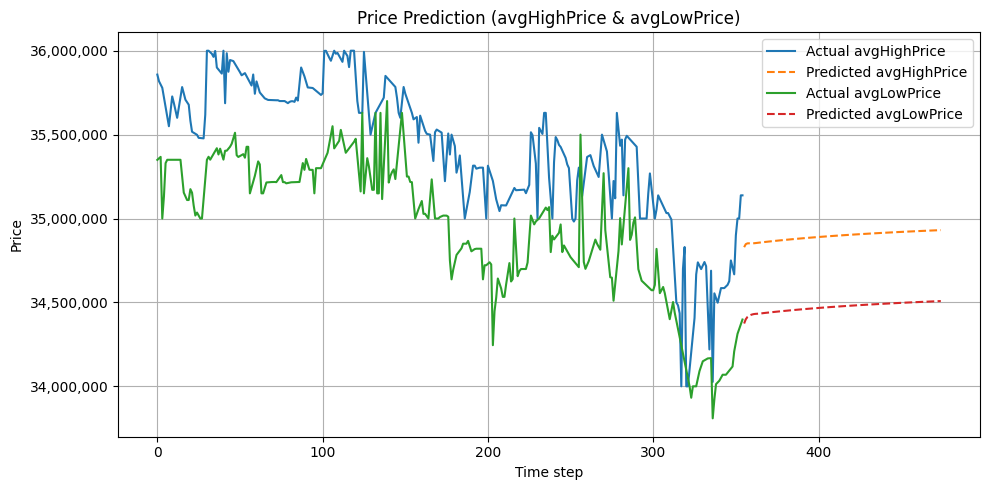

In [54]:
'''Predict inputs using trained model then display for analysis. Use Chapter 8.1.3 graph setup'''

# Convert to NumPy and reshape properly for scaler
preds_np = preds.squeeze(0).cpu().numpy()  # shape: (10, 2)

# Inverse transform the predictions
preds_unscaled = scaler.inverse_transform(preds_np)

# Unnormalize the full known series
y_np = y.cpu().numpy()  # (total_timesteps, 2)
y_unscaled = scaler.inverse_transform(y_np)

# Combine for extended plotting
combined_high = np.concatenate([y_unscaled[:, 0], preds_unscaled[:, 0]])
combined_low = np.concatenate([y_unscaled[:, 1], preds_unscaled[:, 1]])

# X-axis indices
time_range = np.arange(len(combined_high))
split_index = len(y_unscaled)

# Plotting both actual and predicted values
plt.figure(figsize=(10, 5))

# High Price
plt.plot(time_range[:split_index], combined_high[:split_index], label='Actual avgHighPrice')
plt.plot(time_range[split_index:], combined_high[split_index:], label='Predicted avgHighPrice', linestyle='--')

# Low Price
plt.plot(time_range[:split_index], combined_low[:split_index], label='Actual avgLowPrice')
plt.plot(time_range[split_index:], combined_low[split_index:], label='Predicted avgLowPrice', linestyle='--')

plt.title('Price Prediction (avgHighPrice & avgLowPrice)')
plt.xlabel('Time step')
plt.ylabel('Price')

# Format y-axis for readability
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x:,.0f}'))

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
